# Customer Segmentation using K-Means Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# data.drop('CustomerID', axis=1, inplace=True)

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
import warnings
warnings.filterwarnings('ignore')

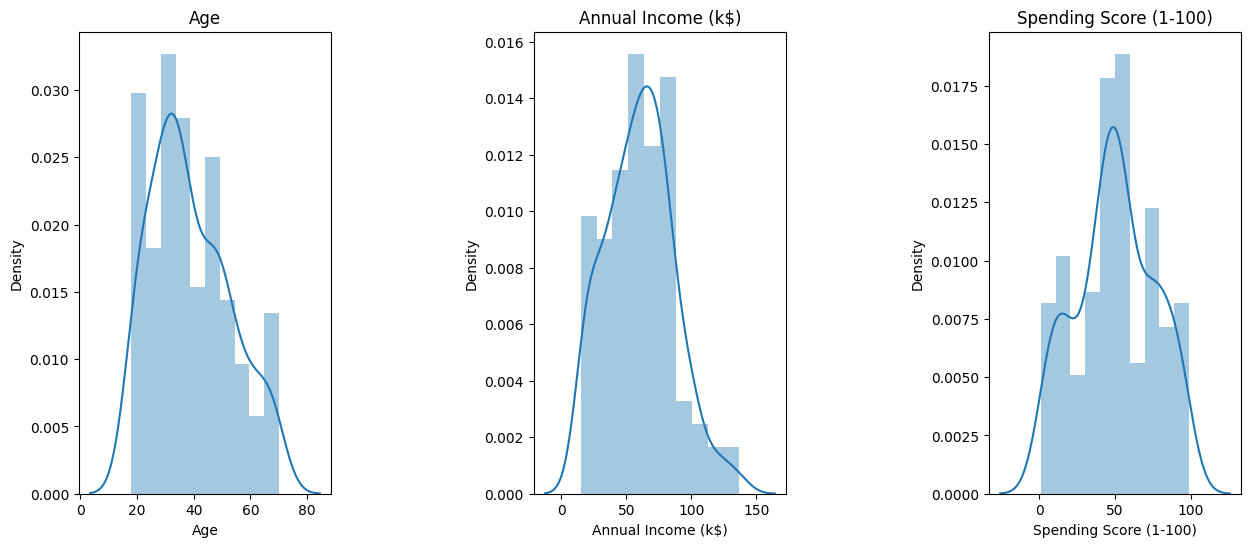

In [12]:
plt.figure(figsize=(15,6))
n = 0
for col in  data.iloc[:,2:]:
    n += 1 
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=1.2, wspace=0.8)
    sns.distplot(data[col], bins=10)
    plt.title(col)
plt.show()

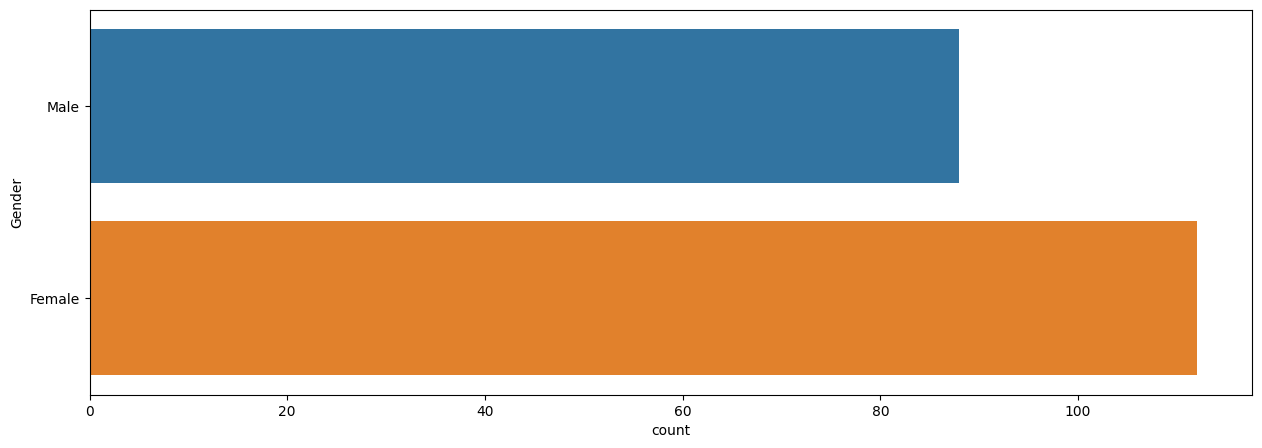

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, y='Gender', hue='Gender')
plt.show()

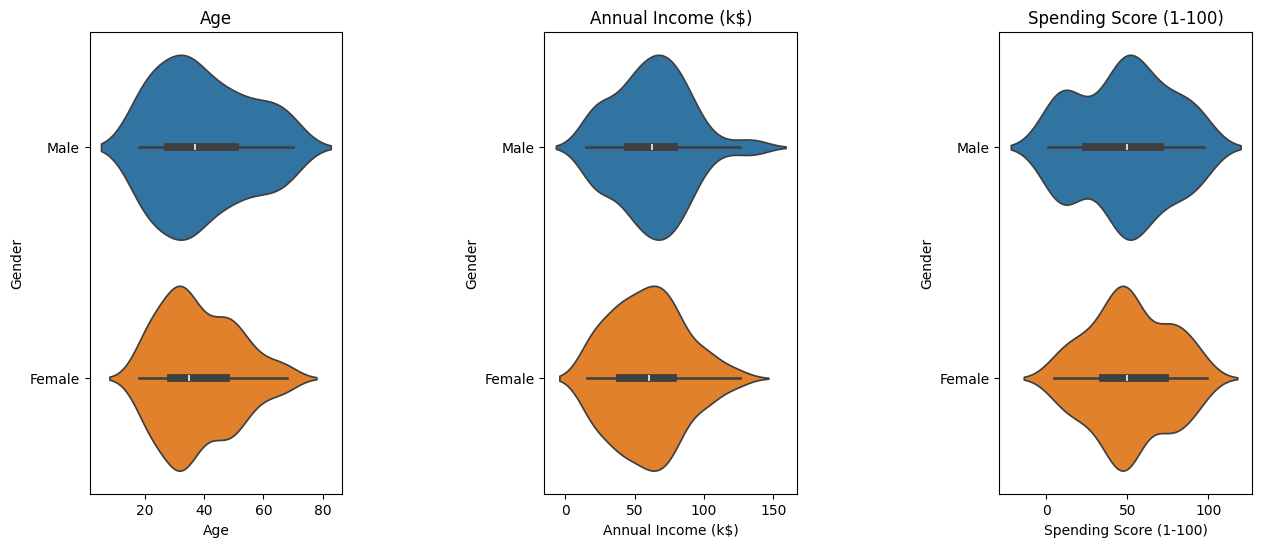

In [14]:
plt.figure(figsize=(15,6))
n = 0
for col in  data.iloc[:,2:]:
    n += 1 
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=1.2, wspace=0.8)
    sns.violinplot(data=data, x=col, y='Gender', hue='Gender')
    plt.title(col)
plt.show()

<Axes: ylabel='Density'>

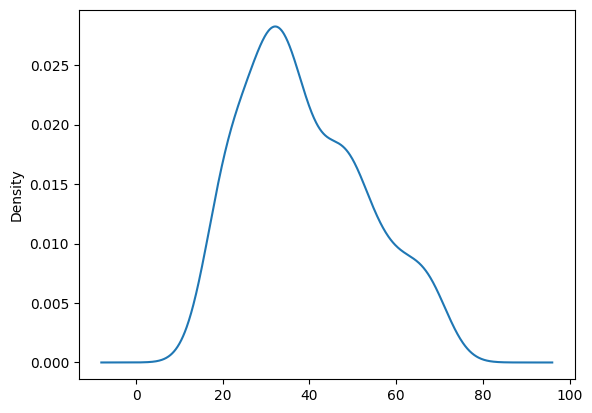

In [15]:
data['Age'].plot(kind='kde')

In [16]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [17]:
def classify(x):
    if (x<=30):
        return '18-30'
    elif x<=40:
        return '31-40'
    elif x<=50:
        return '41-50'
    elif x<=60:
        return '51-60'
    else:
        return '61-70'
    

In [18]:
data['Age_class'] = data['Age'].apply(classify)

In [19]:
data['Age_class'].value_counts()

Age_class
18-30    62
31-40    60
41-50    38
51-60    23
61-70    17
Name: count, dtype: int64

In [20]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_class
0,1,Male,19,15,39,18-30
1,2,Male,21,15,81,18-30
2,3,Female,20,16,6,18-30
3,4,Female,23,16,77,18-30
4,5,Female,31,17,40,31-40


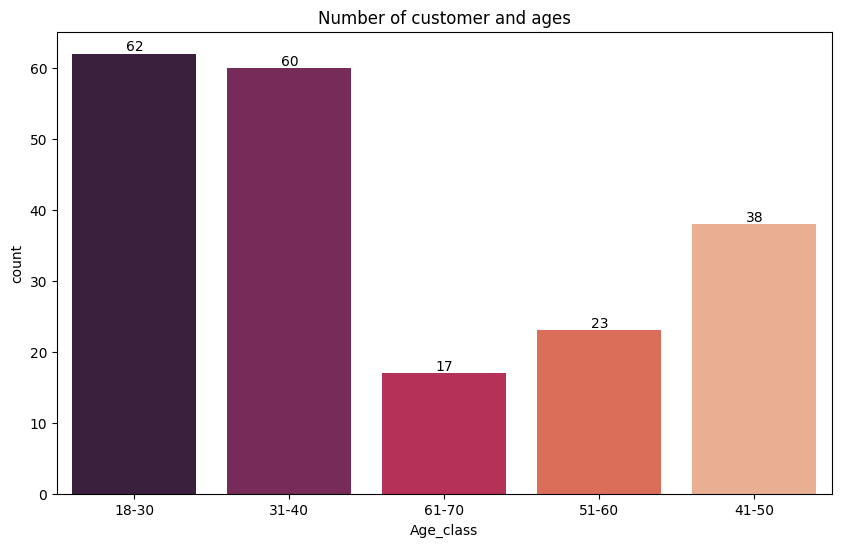

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data, x="Age_class", palette='rocket')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Number of customer and ages")
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

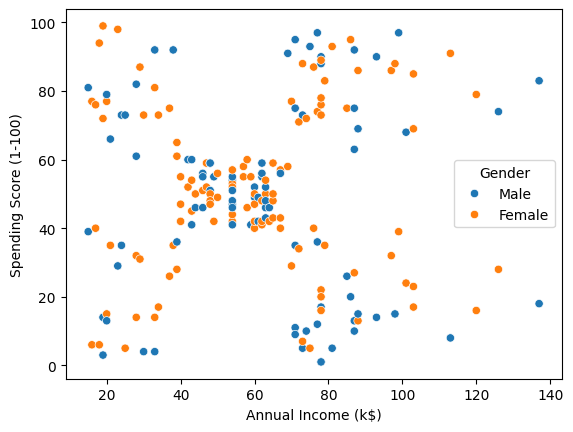

In [22]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

In [23]:
def classify(x):
    if (x<=20):
        return '0-20'
    elif x<=40:
        return '21-40'
    elif x<=60:
        return '41-60'
    elif x<=80:
        return '61-80'
    else:
        return '81-100'
    

In [24]:
data['Spending_Score_class'] = data['Spending Score (1-100)'].apply(classify)

In [25]:
data['Spending_Score_class'].value_counts()

Spending_Score_class
41-60     75
0-20      36
61-80     32
81-100    30
21-40     27
Name: count, dtype: int64

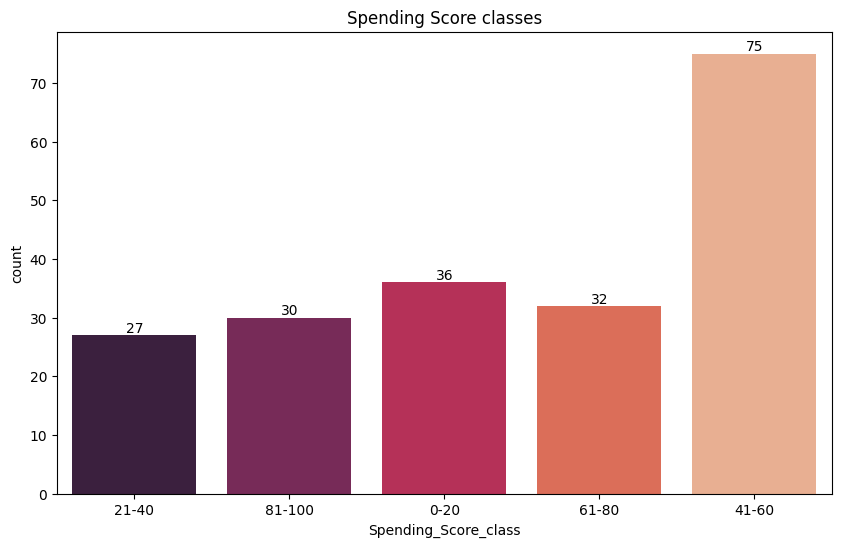

In [26]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data, x="Spending_Score_class", palette='rocket')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Spending Score classes")
plt.show()

In [27]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_class,Spending_Score_class
0,1,Male,19,15,39,18-30,21-40
1,2,Male,21,15,81,18-30,81-100
2,3,Female,20,16,6,18-30,0-20
3,4,Female,23,16,77,18-30,61-80
4,5,Female,31,17,40,31-40,21-40


In [28]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_class', 'Spending_Score_class'],
      dtype='object')

In [29]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [30]:
def classify(x):
    if (x<=40):
        return '15-40'
    elif x<=40:
        return '41-65'
    elif x<=60:
        return '66-90'
    elif x<=80:
        return '91-115'
    else:
        return '115-137'
    

In [31]:
data['Annual_income_class'] = data['Annual Income (k$)'].apply(classify)

In [32]:
data['Annual_income_class'].value_counts()

Annual_income_class
91-115     64
15-40      50
66-90      48
115-137    38
Name: count, dtype: int64

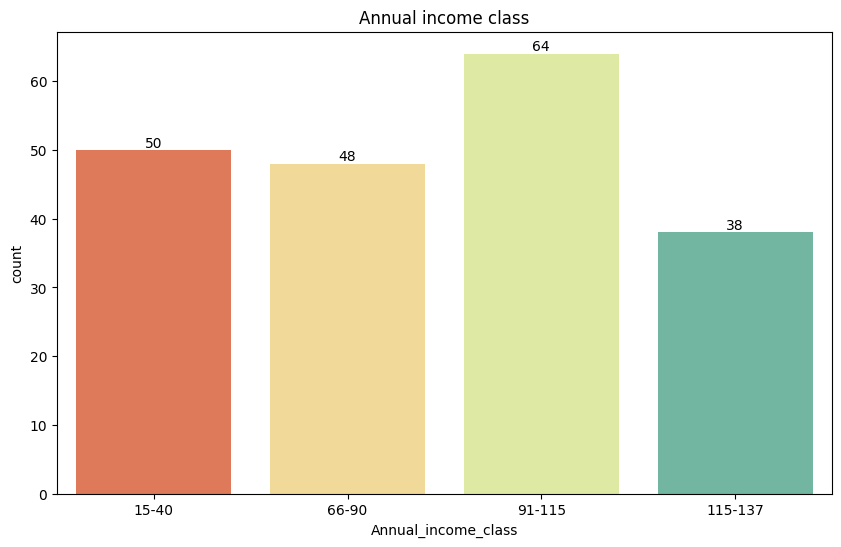

In [33]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data, x="Annual_income_class", palette='Spectral')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Annual income class")
plt.show()

In [34]:
from sklearn.cluster import KMeans

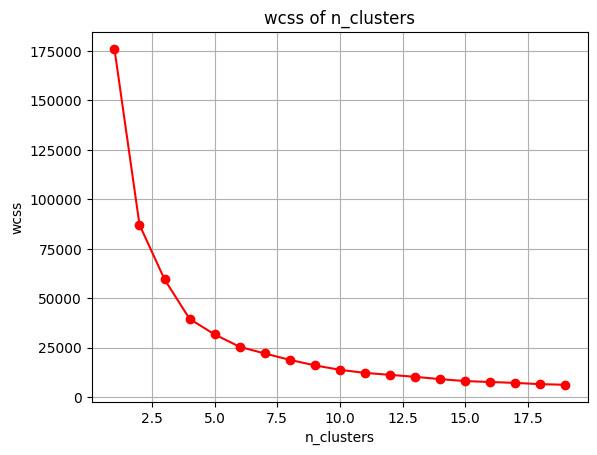

In [38]:
x = data.loc[:,['Age', 'Annual Income (k$)']]
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i).fit(x)
    wcss.append(km.inertia_)
plt.plot(np.arange(1,len(wcss)+1), wcss, marker='o', color='red')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('wcss of n_clusters')
plt.grid()
plt.show()

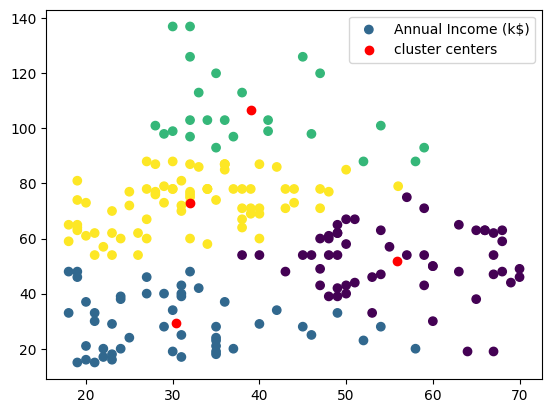

In [39]:
km = KMeans(n_clusters=4).fit(x)
labels = km.labels_
plt.scatter(data=data, x='Age', y='Annual Income (k$)', c=labels)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', label='cluster centers')
plt.legend()
plt.show()

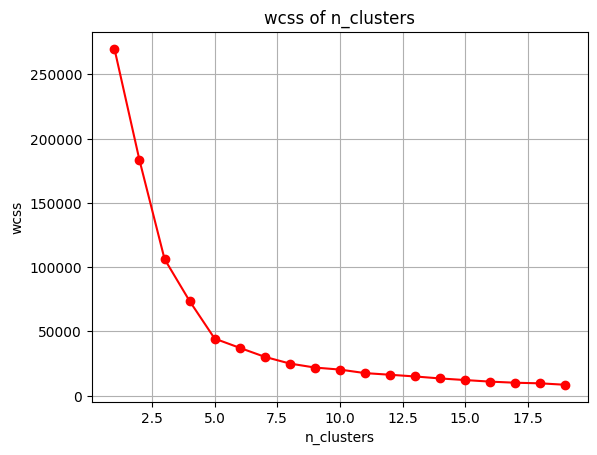

In [40]:
x = data.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i).fit(x)
    wcss.append(km.inertia_)
plt.plot(np.arange(1,len(wcss)+1), wcss, marker='o', color='red')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('wcss of n_clusters')
plt.grid()
plt.show()

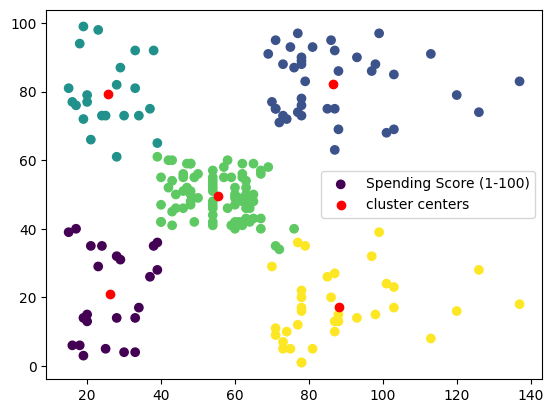

In [41]:
km = KMeans(n_clusters=5).fit(x)
labels = km.labels_
plt.scatter(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', c=labels)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', label='cluster centers')
plt.legend()
plt.show()

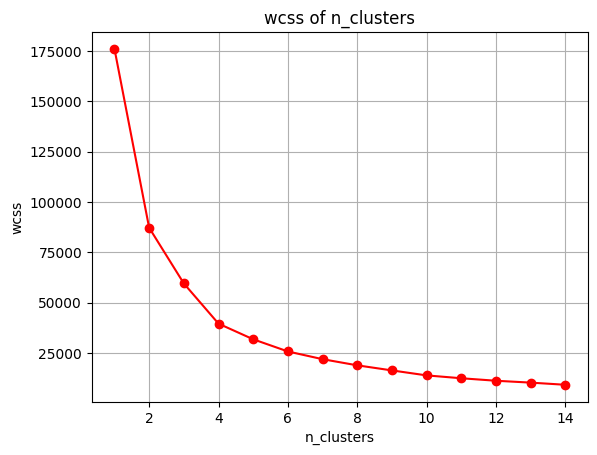

In [42]:
x = data.iloc[:,2:4]
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i).fit(x)
    wcss.append(km.inertia_)
plt.plot(np.arange(1,len(wcss)+1), wcss, marker='o', color='red')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('wcss of n_clusters')
plt.grid()
plt.show()

In [43]:
km = KMeans(n_clusters=6).fit(x)
labels = km.labels_

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_trans = pca.fit_transform(x)
centers = pca.fit_transform(km.cluster_centers_)

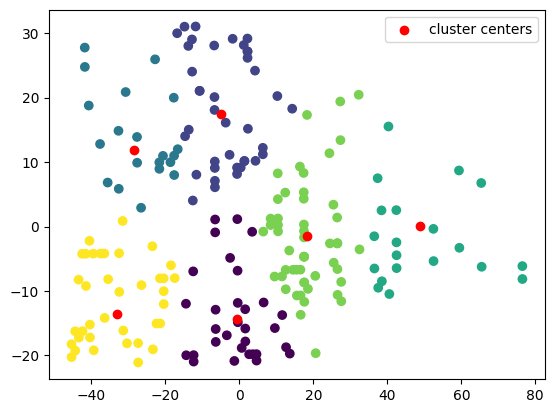

In [45]:

plt.scatter(x_trans[:,0], x_trans[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], color='red', label='cluster centers')
plt.legend()
plt.show()

In [46]:
import plotly.express as px 

In [47]:
customerid_assign = pd.DataFrame({'CustomerID':data['CustomerID'], 'labels':km.labels_})

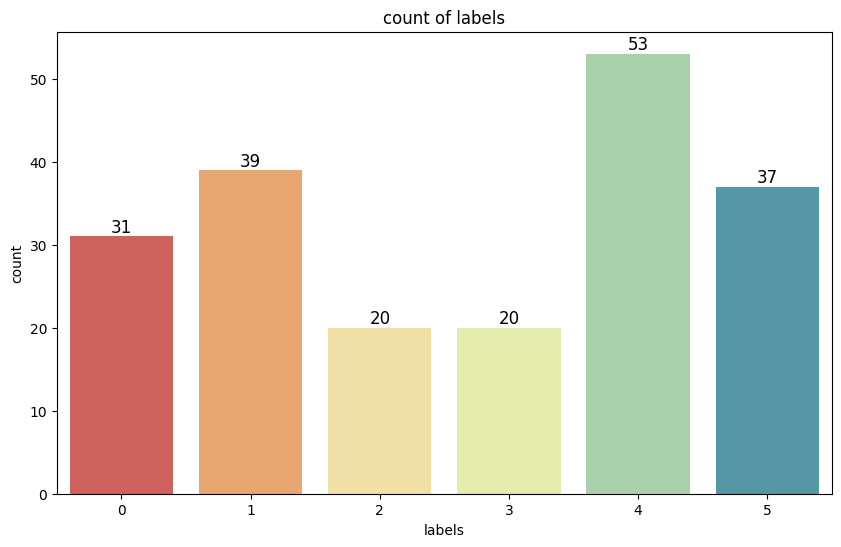

In [48]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(data=customerid_assign, x='labels',palette='Spectral')
for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='black')
plt.title('count of labels')
plt.show()

In [50]:
# Add the label layer to the main dataset. So that, It would be representive that which customer assign to which label.
data['Assign'] = km.labels_

In [53]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_class,Spending_Score_class,Annual_income_class,Assign
0,1,Male,19,15,39,18-30,21-40,15-40,5
1,2,Male,21,15,81,18-30,81-100,15-40,5
2,3,Female,20,16,6,18-30,0-20,15-40,5
3,4,Female,23,16,77,18-30,61-80,15-40,5
4,5,Female,31,17,40,31-40,21-40,15-40,5
